In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata as ad
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import matplotlib
from matplotlib.colors import rgb2hex
from colorcet import glasbey
# import seaborn as sns

import shapely
import shapely.plotting as splot

import scanpy as sc

from thalamus_merfish_analysis import ccf_plots as cplots
from thalamus_merfish_analysis import abc_load as abc

%matplotlib inline

In [3]:
import warnings

# suppress FutureWarning warnings (targeting AnnData & Seaborn)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message=".*Trying to modify attribute `.obs` of view, initializing view as actual.*")

# Load TH+ZI subset of ABC atlas

In [4]:
version = '20230830'
adata_th_zi = abc.load_adata(version=version, transform='log2', 
                             subset_to_TH_ZI=True, with_metadata=True, 
                             flip_y=False, # ccf_plots module expects unflipped y axis
                             round_z=True,
                             with_colors=True) # colors required for displaying by cell type

adata_th_zi_neurons = abc.filter_adata_by_class(adata_th_zi, filter_nonneuronal=True,
                                                filter_midbrain=True)

In [5]:
# grab the obs df
obs_th_neurons = adata_th_zi_neurons.obs.copy()

In [6]:
# load in rasterized CCF volumes
ccf_polygons = abc.get_ccf_labels_image(resampled=True).astype(int)

# Load Prong 1 cluster-nucleus groups

In [7]:
nuclei_df = pd.read_csv("resources/prong1_cluster_annotations_by_nucleus.csv", 
                        index_col=0)

# DE Genes

## Anterior Nuclei

### ANT clusters

In [8]:
# Extract Prong 1 cluster-nucleus groups
taxonomy_level = 'cluster'

AD_cluster_aliases = nuclei_df.loc['AD',:].cluster_alias.split(', ')
AD_cluster_labels = abc.get_taxonomy_label_from_alias(AD_cluster_aliases,
                                                      taxonomy_level, 
                                                      version='20230830')

AV_cluster_aliases = nuclei_df.loc['AV',:].cluster_alias.split(', ')
AV_cluster_labels = abc.get_taxonomy_label_from_alias(AV_cluster_aliases,
                                                      taxonomy_level, 
                                                      version='20230830')

AM_cluster_aliases = nuclei_df.loc['AM',:].cluster_alias.split(', ')
AM_cluster_labels = abc.get_taxonomy_label_from_alias(AM_cluster_aliases,
                                                      taxonomy_level, 
                                                      version='20230830')

ANT_cluster_labels = AD_cluster_labels+AV_cluster_labels+AM_cluster_labels
print(ANT_cluster_labels)

['2613 AD Serpinb7 Glut_1', '2614 AD Serpinb7 Glut_1', '2615 AV Col27a1 Glut_1', '2616 AV Col27a1 Glut_1', '2674 TH Prkcd Grin2c Glut_9', '2668 TH Prkcd Grin2c Glut_8', '2675 TH Prkcd Grin2c Glut_9', '2676 TH Prkcd Grin2c Glut_9']


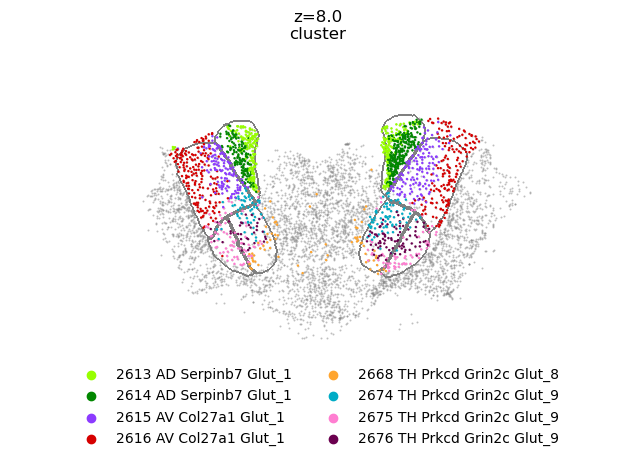

In [9]:
anterior_sec = 8.0
nuclei = ['AD', 'AV', 'AMd', 'AMv']

obs_ANT = adata_th_zi_neurons.obs[adata_th_zi_neurons.obs['cluster'].isin(ANT_cluster_labels)]

section_col = 'z_reconstructed'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'
ccf_label = 'parcellation_substructure'

cplots.plot_ccf_overlay(obs_ANT, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='cluster', sections=[anterior_sec],
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

In [10]:
# # cplots.plot_nucleus_cluster_comparison_slices('AD', adata, nuclei_df, ccf_polygons)
# obs = get_obs_from_annotated_clusters('AD', adata_th_zi_neurons, nuclei_df)
# cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei='AD')

### AD - subclass vs rest

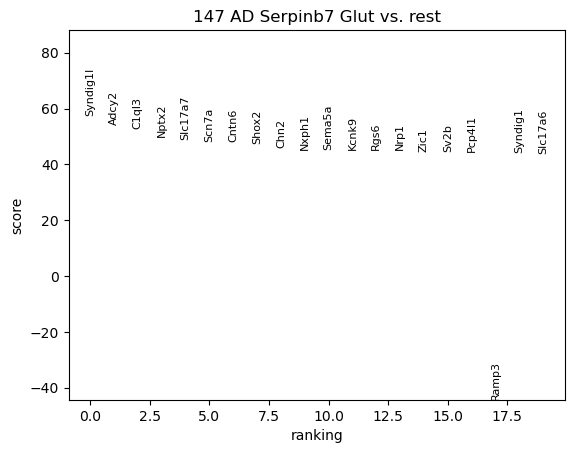

Top 10 pos DE genes for AD subclass:
 ['Syndig1l', 'Adcy2', 'C1ql3', 'Nptx2', 'Slc17a7', 'Scn7a', 'Cntn6', 'Shox2', 'Chn2', 'Nxph1']


In [11]:
# AD subclass - 147 AD Serpinb7 Glut

# Plot top 20 DE genes
sc.tl.rank_genes_groups(adata_th_zi_neurons, 'subclass', 
                        groups=['147 AD Serpinb7 Glut'], method='wilcoxon', 
                        rankby_abs=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

# List top 10 positive DE genes
de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos_AD = de_df[de_df['scores']>0].head(10).names.to_list()
print('Top 10 pos DE genes for AD subclass:\n', de_genes_pos_AD)

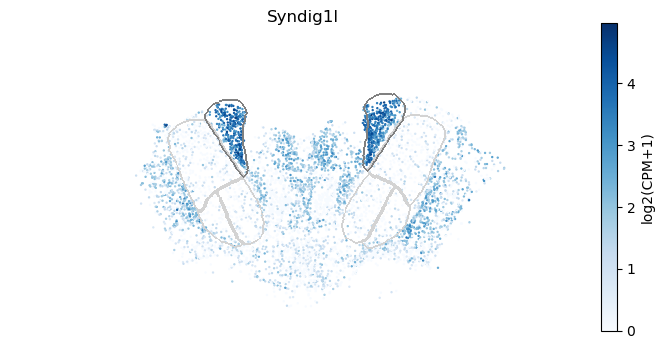

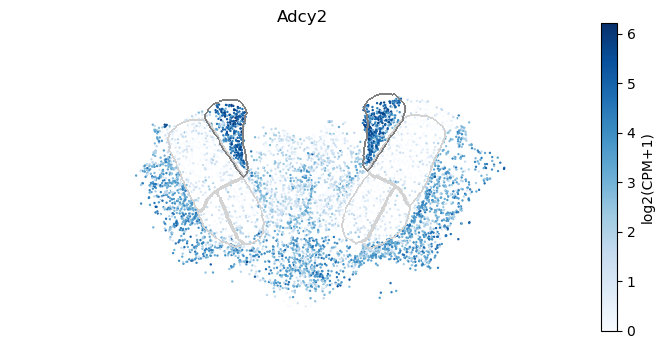

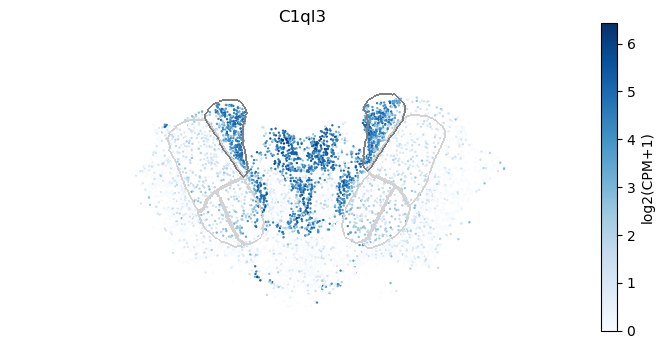

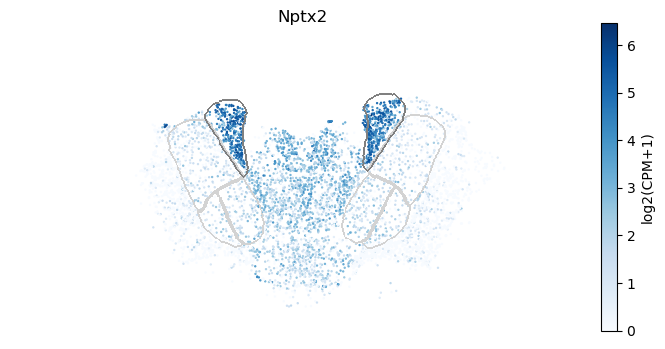

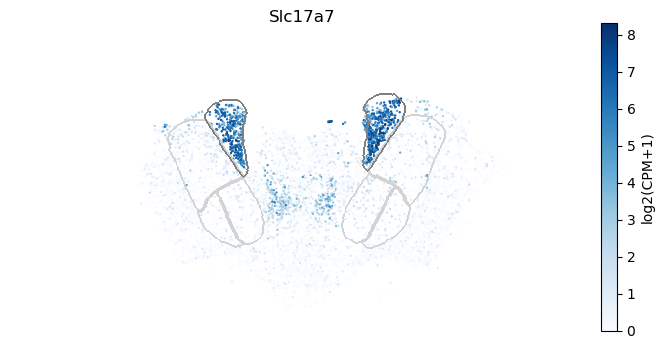

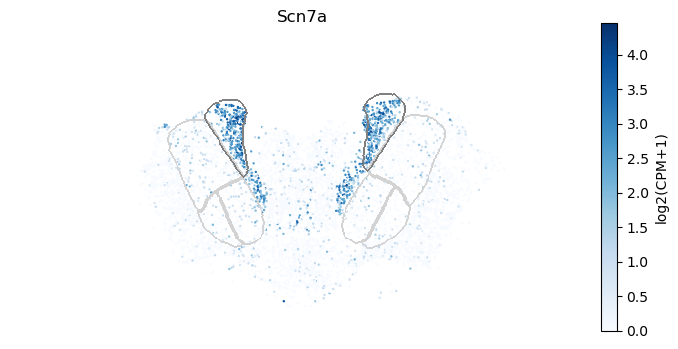

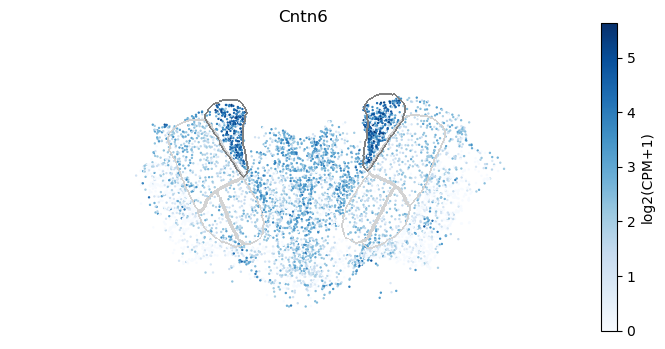

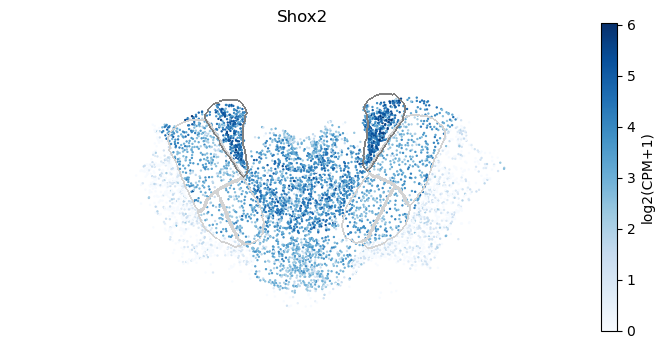

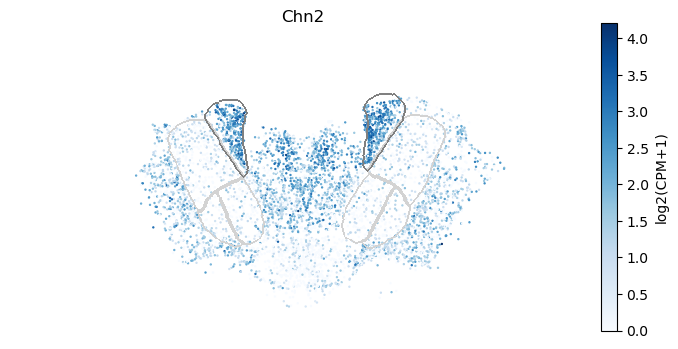

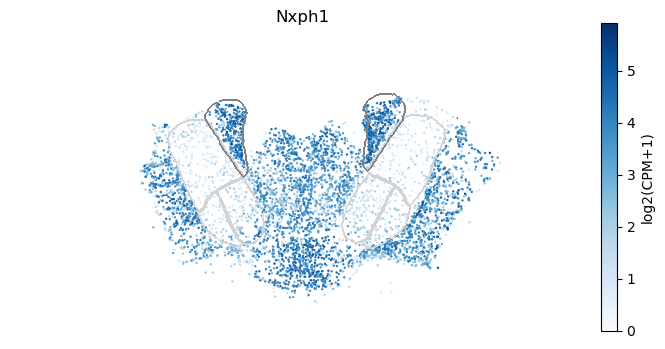

In [12]:
section=['C57BL6J-638850.44']
ant_nuclei=['AD', 'AV', 'AMd', 'AMv']
highlight_nuclei=['AD']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

for gene in de_genes_pos_AD:
    cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                               sections=section, nuclei=ant_nuclei, 
                               highlight=highlight_nuclei,
                               cmap='Blues', bg_shapes=False, show_outline=False,
                               section_col=section_col, 
                               x_col=x_coord_col, y_col=y_coord_col);

### AV - subclass vs rest

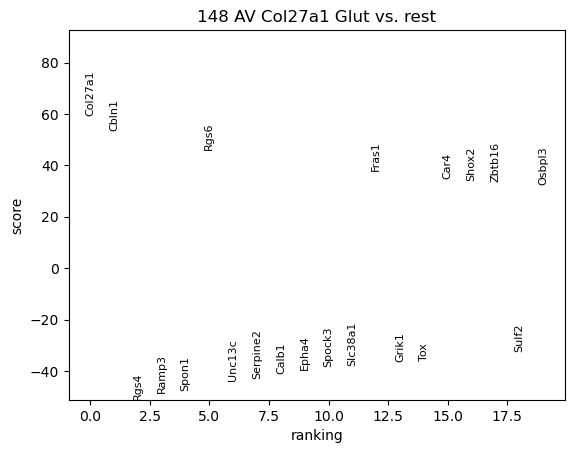

Top 10 pos DE genes for AV subclass:
 ['Col27a1', 'Cbln1', 'Rgs6', 'Fras1', 'Car4', 'Shox2', 'Zbtb16', 'Osbpl3', 'Npsr1', 'C1ql3']


In [13]:
# AV subclass - 148 AV Col27a1 Glut

# Plot top 20 DE genes
sc.tl.rank_genes_groups(adata_th_zi_neurons, 'subclass', 
                        groups=['148 AV Col27a1 Glut'], method='wilcoxon', 
                        rankby_abs=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

# List top 10 positive DE genes
de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos_AV = de_df[de_df['scores']>0].head(10).names.to_list()
print('Top 10 pos DE genes for AV subclass:\n', de_genes_pos_AV)

#### Col27a1

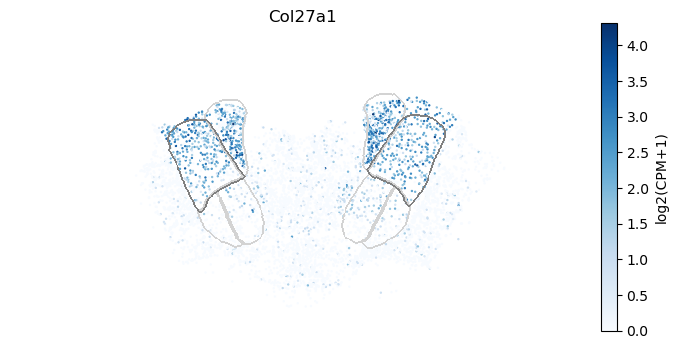

In [14]:
gene = 'Col27a1'

section=['C57BL6J-638850.44']
ant_nuclei=['AD', 'AV', 'AMd', 'AMv']
highlight_nuclei=['AV']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                           sections=section, nuclei=ant_nuclei, 
                           highlight=highlight_nuclei,
                           cmap='Blues', bg_shapes=False, show_outline=False,
                           section_col=section_col, 
                           x_col=x_coord_col, y_col=y_coord_col);

### AV - cluster

#### Sorcs3

Mathew's plots in brain1 suggested high expression exclusively in the '1097 AV Col27a1 Glut cluster' in the AV

That does not appear to be the case in brain3...# Mathew's plots in brain1 suggested high expression exclusively in the '1097 AV Col27a1 Glut cluster' in the AV

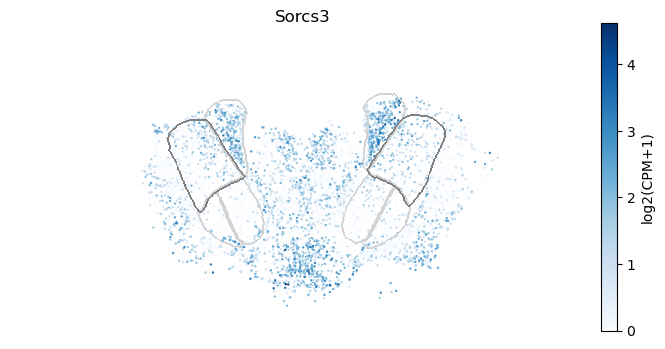

In [15]:
# Mathew's plots in brain1 suggested high expression exclusively in the '1097 AV Col27a1 Glut cluster' in the AV
# That does not appear to be the case in brain3...
gene = 'Sorcs3'

section=['C57BL6J-638850.44']
ant_nuclei=['AD', 'AV', 'AMd', 'AMv']
highlight_nuclei=['AV']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                           sections=section, nuclei=ant_nuclei, 
                           highlight=highlight_nuclei,
                           cmap='Blues', bg_shapes=False, show_outline=False,
                           section_col=section_col, 
                           x_col=x_coord_col, y_col=y_coord_col);

### AM - supertype vs rest

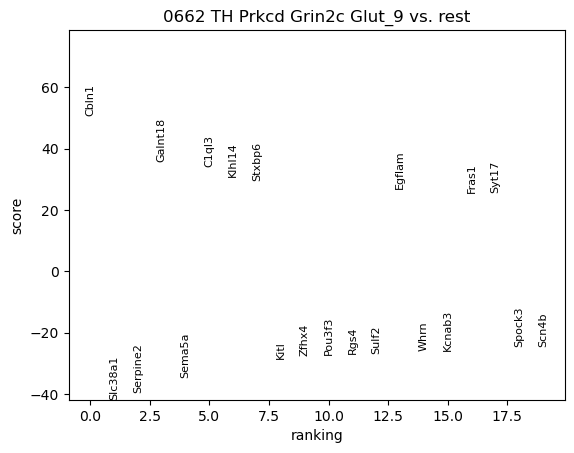

Top 10 pos DE genes for AM supertype:
 ['Cbln1', 'Galnt18', 'C1ql3', 'Klhl14', 'Stxbp6', 'Egflam', 'Fras1', 'Syt17', 'Rgs6', 'Nr2f1']


In [16]:
# AV supertype - 0662 TH Prkcd Grin2c Glut_9

# Plot top 20 DE genes
sc.tl.rank_genes_groups(adata_th_zi_neurons, 'supertype', 
                        groups=['0662 TH Prkcd Grin2c Glut_9'],  
                        method='wilcoxon', rankby_abs=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

# List top 10 positive DE genes
de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos_AM = de_df[de_df['scores']>0].head(10).names.to_list()
print('Top 10 pos DE genes for AM supertype:\n', de_genes_pos_AM)

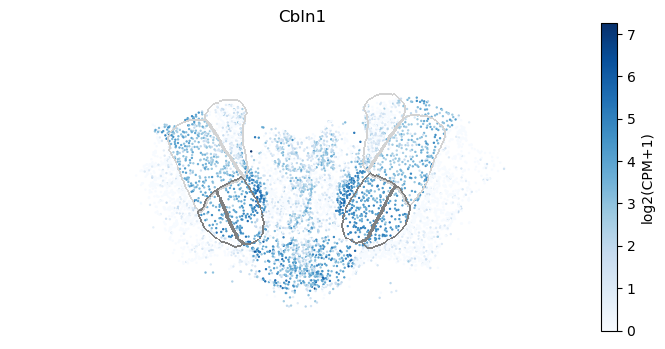

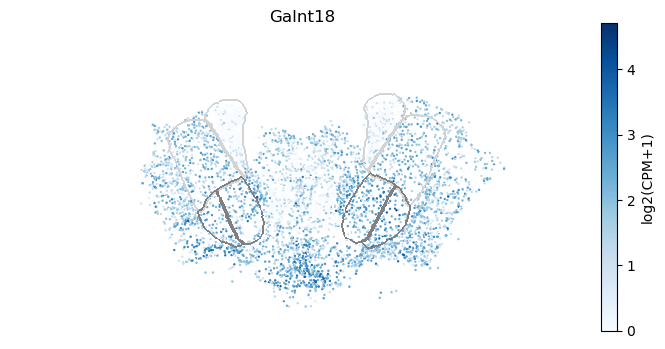

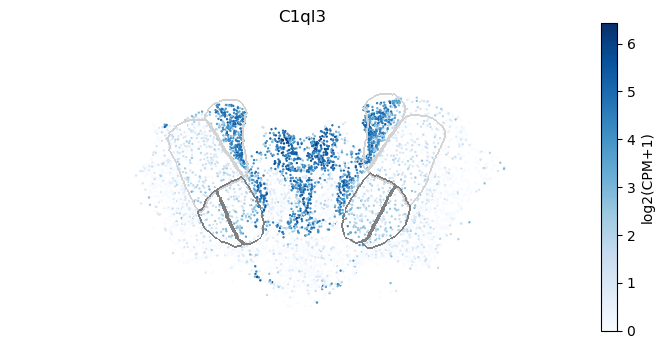

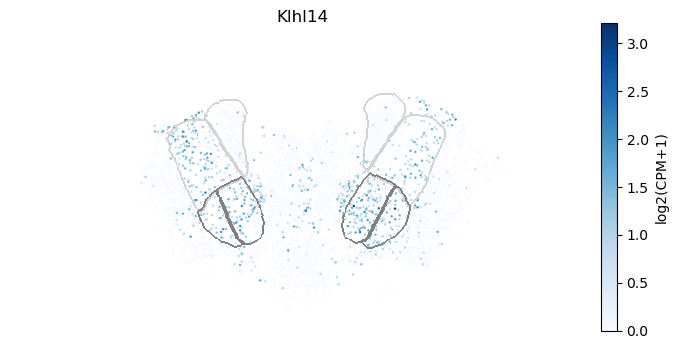

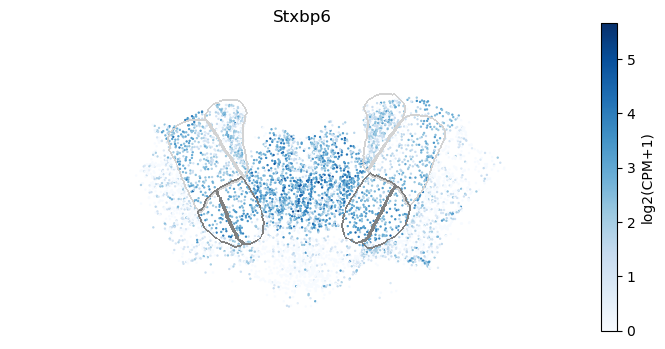

In [17]:
section=['C57BL6J-638850.44']
ant_nuclei=['AD', 'AV', 'AMd', 'AMv']
highlight_nuclei=['AMv','AMd']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

for gene in de_genes_pos_AM[:5]:
    cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                               sections=section, nuclei=ant_nuclei, 
                               highlight=highlight_nuclei,
                               cmap='Blues', bg_shapes=False, show_outline=False,
                               section_col=section_col, 
                               x_col=x_coord_col, y_col=y_coord_col);

### ANT vs rest

In [18]:
# obs_th_neurons['anterior_type'] = (obs_th_neurons['supertype'].str.contains('Glut_9') |
#                                        obs_th_neurons['supertype'].str.contains('AD') |
#                                        obs_th_neurons['supertype'].str.contains('AV')).astype(str)

In [19]:
# gene = "C1ql3"
# cplots.plot_expression_ccf()

# gene = "Shox2"
# cplots.plot_expression_ccf()

## VM

In [20]:
taxonomy_level = 'cluster'

VM_cluster_aliases = nuclei_df.loc['VM',:].cluster_alias.split(', ')
VM_cluster_labels = abc.get_taxonomy_label_from_alias(VM_cluster_aliases,
                                                      taxonomy_level, 
                                                      version='20230830')
print(VM_cluster_aliases); print(VM_cluster_labels)

VAL_VM_cluster_aliases = nuclei_df.loc['VAL VM',:].cluster_alias.split(', ')
VAL_VM_cluster_labels = abc.get_taxonomy_label_from_alias(VAL_VM_cluster_aliases,
                                                          taxonomy_level, 
                                                          version='20230830')
print(VAL_VM_cluster_aliases); print(VAL_VM_cluster_labels)

['5019', '5058']
['2684 TH Prkcd Grin2c Glut_13', '2687 TH Prkcd Grin2c Glut_13']
['5065']
['2683 TH Prkcd Grin2c Glut_13']


### DE - VM vs VAL top cluster

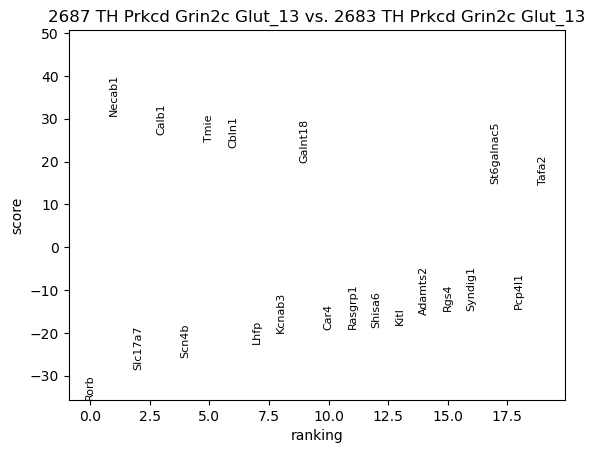

Top 10 pos DE genes:
 ['Necab1', 'Calb1', 'Tmie', 'Cbln1', 'Galnt18', 'St6galnac5', 'Tafa2', 'Sorcs3', 'Stxbp6', 'Rxfp1']

 Top 10 neg DE genes:
 ['Rorb', 'Slc17a7', 'Scn4b', 'Lhfp', 'Kcnab3', 'Car4', 'Rasgrp1', 'Shisa6', 'Kitl', 'Adamts2']


In [21]:
sc.tl.rank_genes_groups(adata_th_zi_neurons, taxonomy_level, 
                        groups=[VM_cluster_labels[1]], 
                        reference=VAL_VM_cluster_labels[0], 
                        method='wilcoxon', rankby_abs=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos = de_df[de_df['scores']>0].head(10).names.to_list()
de_genes_neg = de_df[de_df['scores']<0].head(10).names.to_list()
print('Top 10 pos DE genes:\n', de_genes_pos)
print('\n','Top 10 neg DE genes:\n', de_genes_neg)

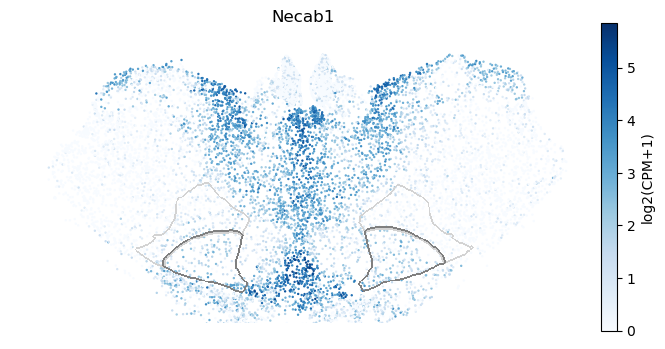

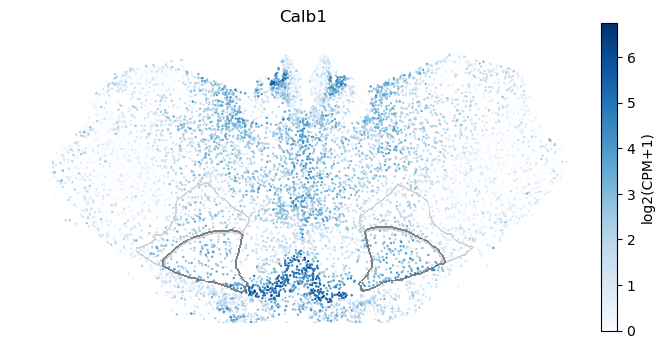

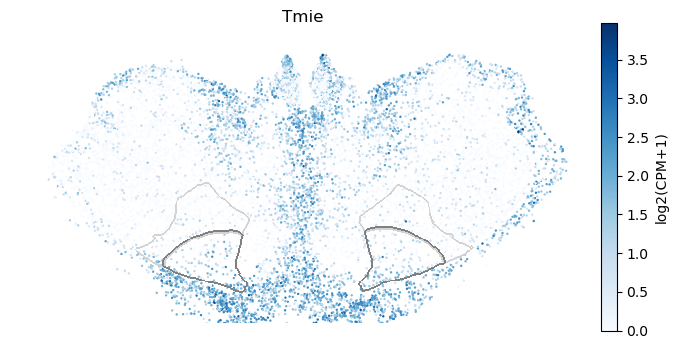

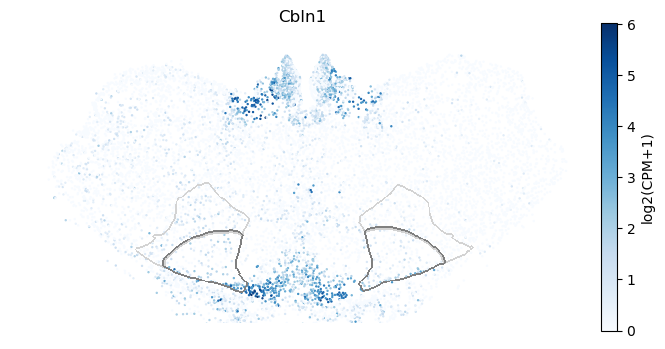

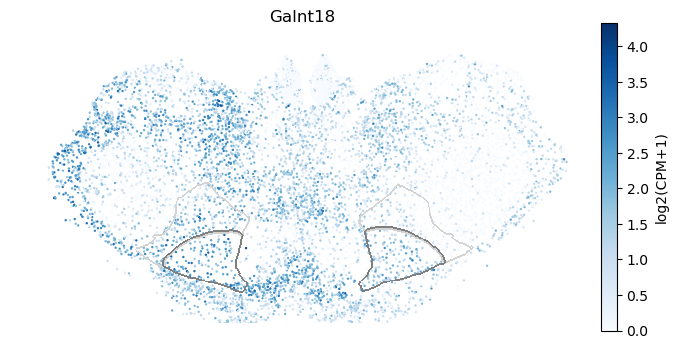

In [22]:
section=['C57BL6J-638850.40']
nuclei=['VM', 'VAL']
highlight=['VM']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

for gene in de_genes_pos[:5]:
    cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                               sections=section, nuclei=nuclei, 
                               highlight=highlight,
                               cmap='Blues', bg_shapes=False, show_outline=False,
                               section_col=section_col, 
                               x_col=x_coord_col, y_col=y_coord_col);

### DE - VM cluster vs rest

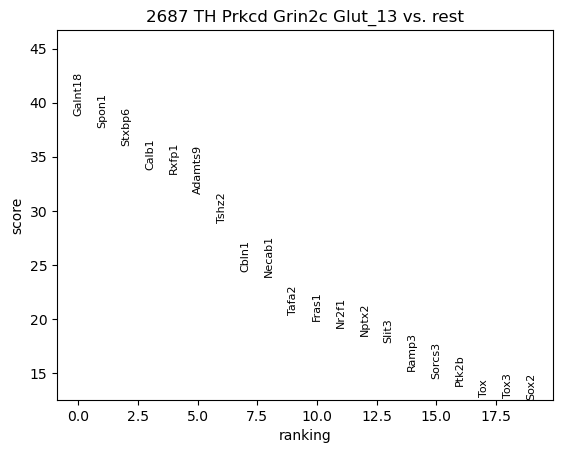

Top 10 pos DE genes:
 ['Galnt18', 'Spon1', 'Stxbp6', 'Calb1', 'Rxfp1', 'Adamts9', 'Tshz2', 'Cbln1', 'Necab1', 'Tafa2']


In [23]:
sc.tl.rank_genes_groups(adata_th_zi_neurons, 'cluster', 
                        groups=[VM_cluster_labels[1]], 
                        method='wilcoxon', tie_correct=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

# get list of genes from plot
de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos = de_df[de_df['scores']>0].head(10).names.to_list()
print('Top 10 pos DE genes:\n', de_genes_pos)

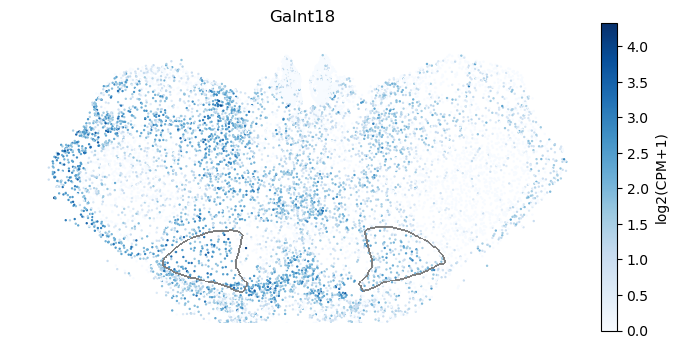

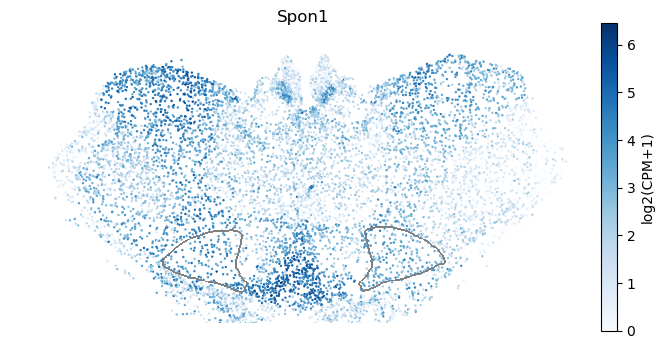

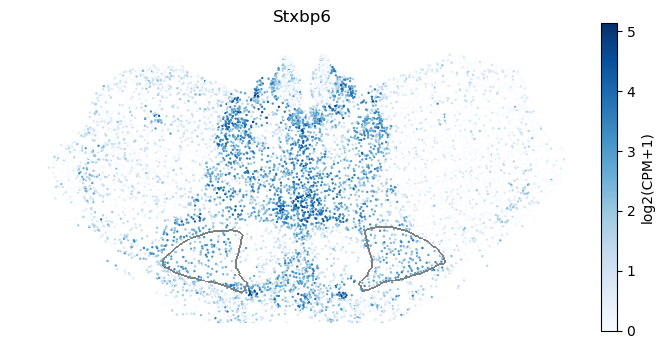

In [24]:
# ISH diff ex search
# https://mouse.brain-map.org/gene/show/87708

section=['C57BL6J-638850.40']
nuclei=['VM']
highlight=['VM']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

for gene in de_genes_pos[:3]:
    cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                               sections=section, nuclei=nuclei, 
                               highlight=highlight,
                               cmap='Blues', bg_shapes=False, show_outline=False,
                               section_col=section_col, 
                               x_col=x_coord_col, y_col=y_coord_col);

### DE - VM supertype vs rest

In [25]:
taxonomy_level = 'supertype'

VM_cluster_aliases = nuclei_df.loc['VM',:].cluster_alias.split(', ')
VM_st_labels = abc.get_taxonomy_label_from_alias(VM_cluster_aliases,
                                                      taxonomy_level, 
                                                      version='20230830')
VM_st_labels

['0666 TH Prkcd Grin2c Glut_13', '0666 TH Prkcd Grin2c Glut_13']

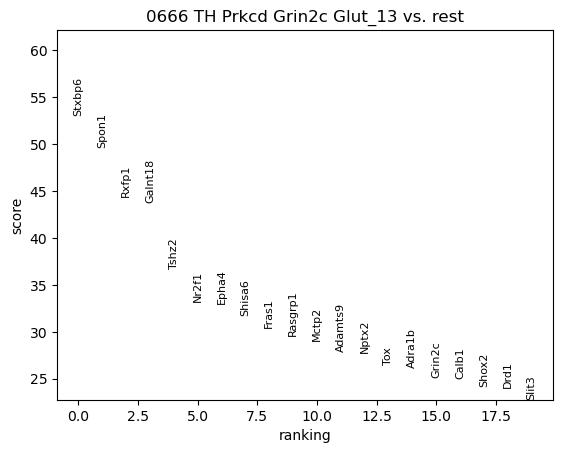

Top 10 pos DE genes:
 ['Stxbp6', 'Spon1', 'Rxfp1', 'Galnt18', 'Tshz2', 'Nr2f1', 'Epha4', 'Shisa6', 'Fras1', 'Rasgrp1']


In [26]:
sc.tl.rank_genes_groups(adata_th_zi_neurons, 'supertype', 
                        groups=['0666 TH Prkcd Grin2c Glut_13'], 
                        method='wilcoxon', tie_correct=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

# get list of genes from plot
de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos = de_df[de_df['scores']>0].head(10).names.to_list()
print('Top 10 pos DE genes:\n', de_genes_pos)

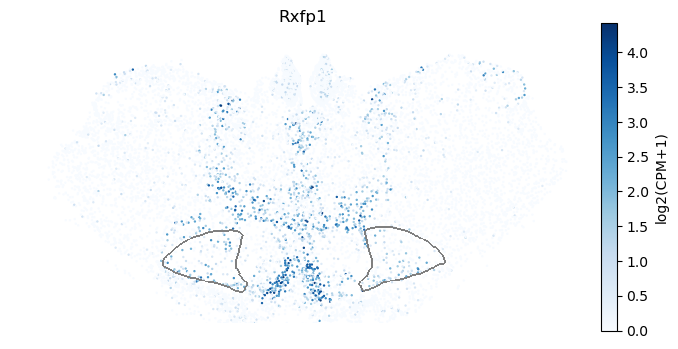

In [27]:
gene = 'Rxfp1'

section=['C57BL6J-638850.40']
nuclei=['VM']
highlight=['VM']

section_col = 'brain_section_label'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                           sections=section, nuclei=nuclei, 
                           highlight=highlight,
                           cmap='Blues', bg_shapes=False, show_outline=False,
                           section_col=section_col, 
                           x_col=x_coord_col, y_col=y_coord_col);

### outlining VM / composition

In [28]:
# import geopandas as gp
# neuron_points = gp.GeoSeries.from_xy(*obs_th_neurons[['cirro_x','cirro_y']].values.T, 
#                                      index=obs_th_neurons_names)

# import hdbscan
# section='C57BL6J-638850.40'
# adata_vm = adata_th_zi_neurons[obs.query(f"section=='{section}' & cluster=='1142'").index].copy()
# df = adata_vm.obs
# X = df[['cirro_x','cirro_y']].values
# df['spatial_cluster'] = hdbscan.HDBSCAN(min_samples=5).fit_predict(X)
# core_clusters = df['spatial_cluster'].value_counts().index[:2]
# df['spatial_group'] = df['spatial_cluster'].apply(lambda x: 'core' if x in core_clusters else 'other')

# sns.scatterplot(data=df,  x='cirro_x', y='cirro_y', hue='spatial_cluster', s=4,  legend=True, palette='tab10')

# nucleus = cshapes.get_polygon_from_obs(df.query("spatial_group=='core'"))
# subset = neuron_points.geometry.intersects(nucleus)
# obs_th_neurons['in_nucleus'] = subset.values
# adata_nucleus = adata_th_zi_neurons[subset]

# obs.query(f"section=='{section}' & supertype=='TH Prkcd Grin2c Glut_13'").groupby(['cluster'])['in_nucleus'].apply(lambda x: x.value_counts())

# # need to include VAL types ??

# sc.tl.rank_genes_groups(adata_vm, 'spatial_group', groups=['core'], reference='other', method='wilcoxon', rankby_abs=True)
# sc.pl.rank_genes_groups(adata_vm, groups=['core'], n_genes=20)

## MD

In [29]:
# Extract Prong 1 cluster-nucleus groups
taxonomy_level = 'cluster'

MD_cluster_aliases = nuclei_df.loc['MD',:].cluster_alias.split(', ')
MD_cluster_labels = abc.get_taxonomy_label_from_alias(MD_cluster_aliases,
                                                      taxonomy_level, 
                                                      version='20230830')
print(MD_cluster_labels)

# TODO: should probably remove 2677 from annotation

['2677 TH Prkcd Grin2c Glut_10', '2678 TH Prkcd Grin2c Glut_10']


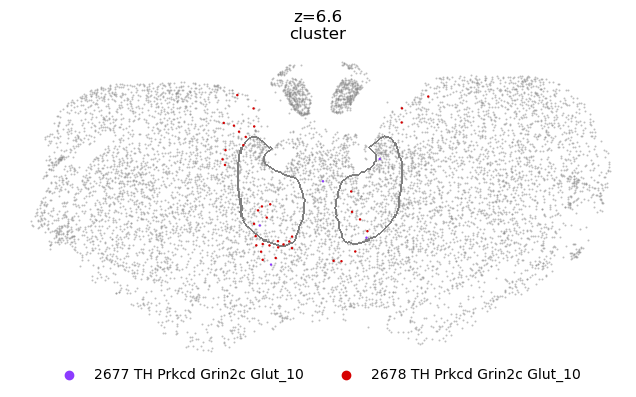

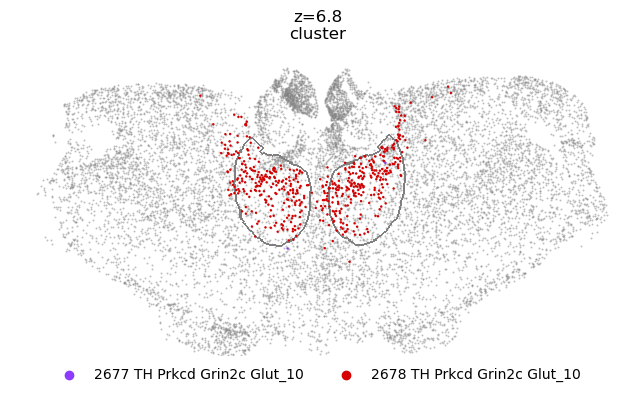

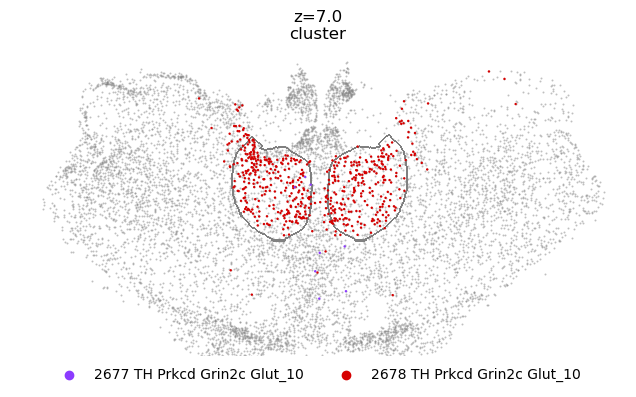

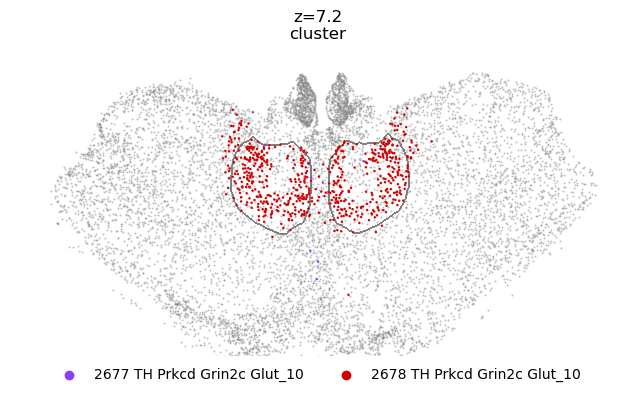

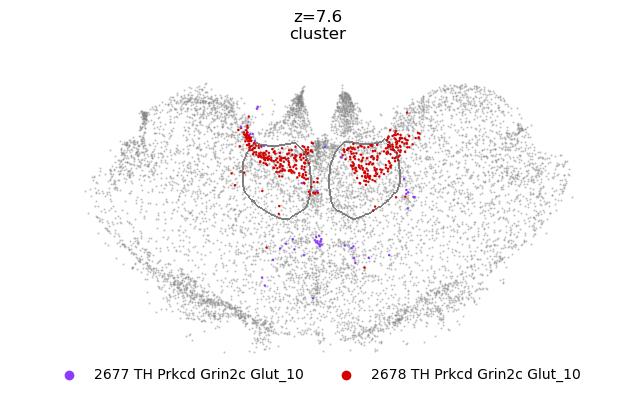

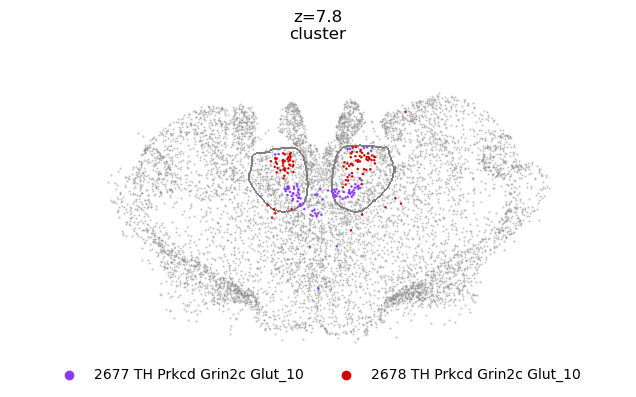

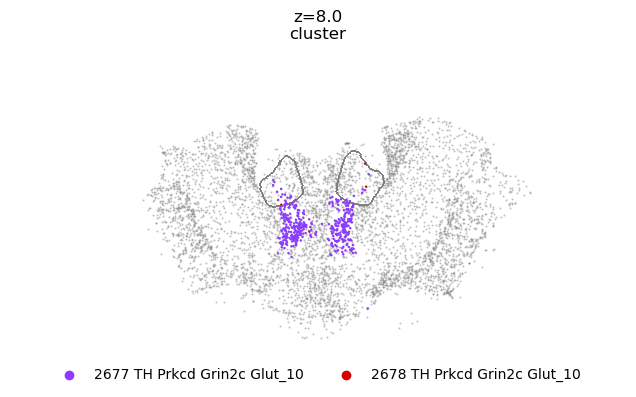

In [30]:
sections_md = [6.6, 6.8, 7.0, 7.2, 7.6, 7.8, 8.0]
nuclei = ['MD']

obs_MD = adata_th_zi_neurons.obs[adata_th_zi_neurons.obs['cluster'].isin(MD_cluster_labels)]

section_col = 'z_reconstructed'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'
ccf_label = 'parcellation_substructure'

cplots.plot_ccf_overlay(obs_MD, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='cluster', sections=sections_md,
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

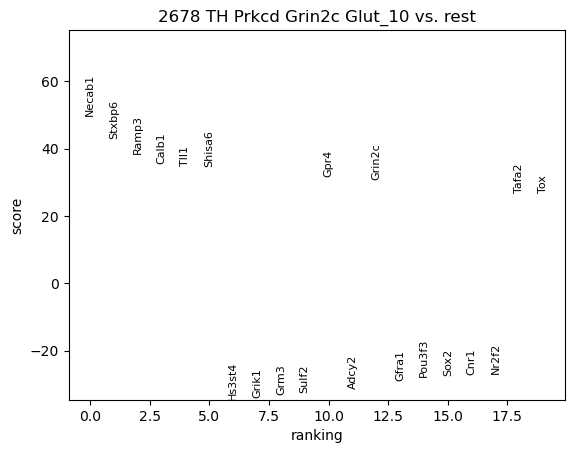

Top 10 pos DE genes:
 ['Necab1', 'Stxbp6', 'Ramp3', 'Calb1', 'Tll1', 'Shisa6', 'Gpr4', 'Grin2c', 'Tafa2', 'Tox']

 Top 10 neg DE genes:
 ['Hs3st4', 'Grik1', 'Grm3', 'Sulf2', 'Adcy2', 'Gfra1', 'Pou3f3', 'Sox2', 'Cnr1', 'Nr2f2']


In [31]:
# TODO: should probably remove 2677 from annotation
sc.tl.rank_genes_groups(adata_th_zi_neurons, taxonomy_level, 
                        groups=[MD_cluster_labels[1]], 
                        method='wilcoxon', rankby_abs=True)
sc.pl.rank_genes_groups(adata_th_zi_neurons, n_genes=20)

de_df = sc.get.rank_genes_groups_df(adata_th_zi_neurons, group=None)
de_genes_pos_MD = de_df[de_df['scores']>0].head(10).names.to_list()
de_genes_neg_MD = de_df[de_df['scores']<0].head(10).names.to_list()
print('Top 10 pos DE genes:\n', de_genes_pos_MD)
print('\n','Top 10 neg DE genes:\n', de_genes_neg_MD)

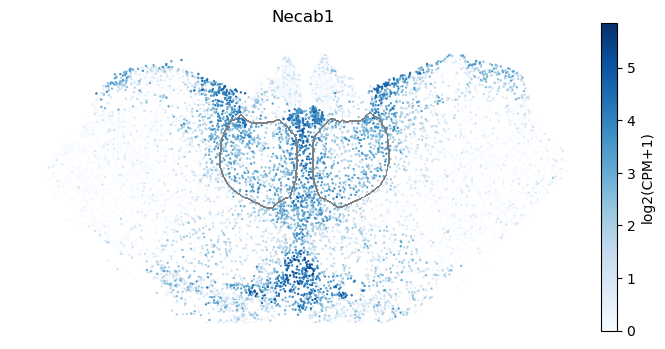

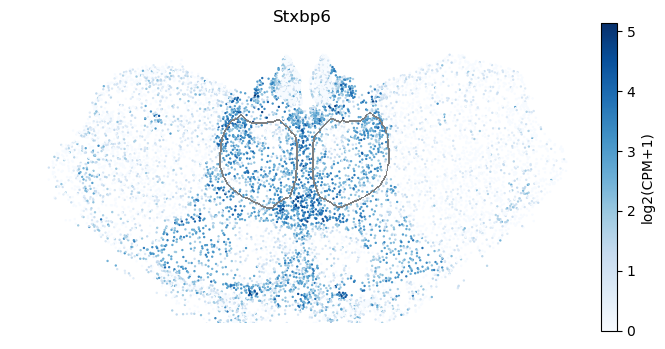

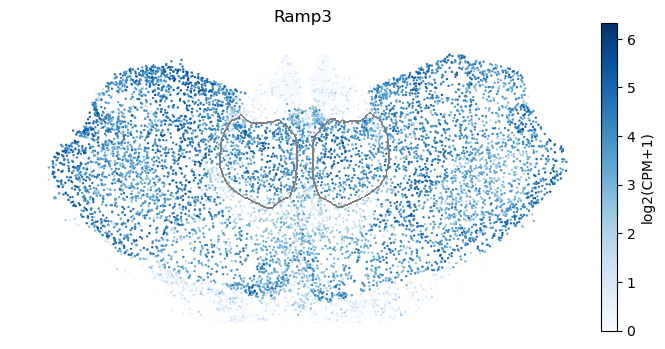

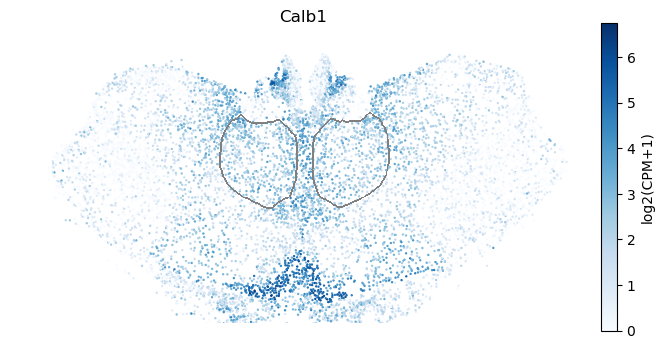

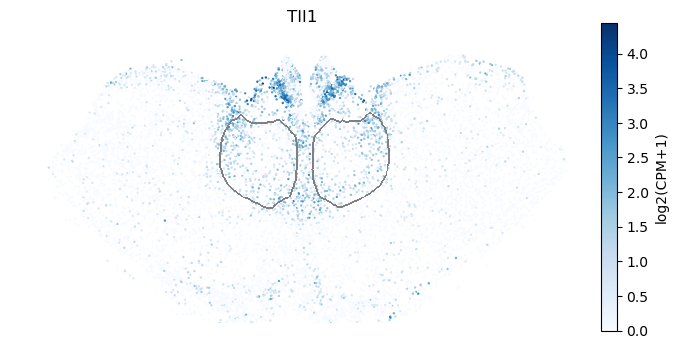

In [32]:
section=[7.2]
md_nuclei=['MD']

section_col = 'z_reconstructed'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

for gene in de_genes_pos_MD[:5]:
    cplots.plot_expression_ccf(adata_th_zi_neurons, gene, ccf_polygons,
                               sections=section, nuclei=md_nuclei, 
                               highlight=md_nuclei,
                               cmap='Blues', bg_shapes=False, show_outline=False,
                               section_col=section_col, 
                               x_col=x_coord_col, y_col=y_coord_col);